In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

In [2]:
Retail_data = pd.read_csv(r'C:\Users\Olamilekan .A. David\OneDrive\Documents\Data Analytics\Quantium\Customer Analysis\QVI_data.csv')
Retail_data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [3]:
# Summary statistics for numerical columns for better understanding
print(Retail_data.describe())

       LYLTY_CARD_NBR      STORE_NBR        TXN_ID       PROD_NBR  \
count    2.648340e+05  264834.000000  2.648340e+05  264834.000000   
mean     1.355488e+05     135.079423  1.351576e+05      56.583554   
std      8.057990e+04      76.784063  7.813292e+04      32.826444   
min      1.000000e+03       1.000000  1.000000e+00       1.000000   
25%      7.002100e+04      70.000000  6.760050e+04      28.000000   
50%      1.303570e+05     130.000000  1.351365e+05      56.000000   
75%      2.030940e+05     203.000000  2.026998e+05      85.000000   
max      2.373711e+06     272.000000  2.415841e+06     114.000000   

            PROD_QTY      TOT_SALES      PACK_SIZE  
count  264834.000000  264834.000000  264834.000000  
mean        1.905813       7.299346     182.425512  
std         0.343436       2.527241      64.325148  
min         1.000000       1.500000      70.000000  
25%         2.000000       5.400000     150.000000  
50%         2.000000       7.400000     170.000000  
75%    

In [4]:
# Frequency counts for categorical columns
for column in Retail_data.select_dtypes(include=['object']).columns:
    print(Retail_data[column].value_counts())


2018-12-24    939
2018-12-23    917
2018-12-22    915
2018-12-19    906
2018-12-18    862
             ... 
2018-12-12    664
2019-06-24    662
2019-06-13    659
2018-10-18    658
2018-11-25    648
Name: DATE, Length: 364, dtype: int64
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64
KETTLE        41288
SMITHS        31823
DORITOS       28145
PRINGLES      25102
RRD           17779
WOOLWORTHS    14757
INFUZIONS     14201
THINS         14075
COBS           9693
TO

In [5]:
# setting my plot themes
import matplotlib.pyplot as plt
plt.style.use('ggplot') 


In [6]:
# adding new month ID with the format yyyymm
Retail_data['DATE'] = pd.to_datetime(Retail_data['DATE'])
Retail_data['YEARMONTH'] = Retail_data['DATE'].dt.to_period('M')


In [7]:
Retail_data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEARMONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018-10
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018-09
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019-03
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,2019-03
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018-11


In [8]:
# filter stores that are present throughout the pre-trial period
pre_trial_data = Retail_data[Retail_data['DATE'] < '2019-02-01']
stores_present_pre_trial = pre_trial_data['STORE_NBR'].unique()


In [9]:
stores_present_pre_trial

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 18

In [10]:
# Calculate metrics of Interest over time for each staore
# Monthly overall sales revenue
monthly_revenue = pre_trial_data.groupby(['STORE_NBR', 'YEARMONTH'])['TOT_SALES'].sum()
monthly_revenue


STORE_NBR  YEARMONTH
1          2018-07      206.9
           2018-08      176.1
           2018-09      278.8
           2018-10      188.1
           2018-11      192.6
                        ...  
272        2018-09      304.7
           2018-10      430.6
           2018-11      376.2
           2018-12      403.9
           2019-01      423.0
Name: TOT_SALES, Length: 1848, dtype: float64

In [11]:
# Monthly number of customers
monthly_customers = pre_trial_data.groupby(['STORE_NBR', 'YEARMONTH'])['LYLTY_CARD_NBR'].nunique()
monthly_customers


STORE_NBR  YEARMONTH
1          2018-07      49
           2018-08      42
           2018-09      59
           2018-10      44
           2018-11      46
                        ..
272        2018-09      32
           2018-10      44
           2018-11      41
           2018-12      47
           2019-01      46
Name: LYLTY_CARD_NBR, Length: 1848, dtype: int64

In [12]:
# Monthly number of transactions per customer
monthly_transactions_per_customer = pre_trial_data.groupby(['STORE_NBR', 'YEARMONTH']).size() / monthly_customers
monthly_transactions_per_customer


STORE_NBR  YEARMONTH
1          2018-07      1.061224
           2018-08      1.023810
           2018-09      1.050847
           2018-10      1.022727
           2018-11      1.021739
                          ...   
272        2018-09      1.125000
           2018-10      1.159091
           2018-11      1.097561
           2018-12      1.000000
           2019-01      1.086957
Length: 1848, dtype: float64

In [13]:
# Group the data by store number and year-month
grouped_data = Retail_data.groupby(['STORE_NBR', 'YEARMONTH'])

# Total sales
totSales = grouped_data['TOT_SALES'].sum()

# Number of customers
nCustomers = grouped_data['LYLTY_CARD_NBR'].nunique()

# Transactions per customer
nTxnPerCust = grouped_data.size() / nCustomers

# Chips per transaction
nChipsPerTxn = grouped_data['PROD_QTY'].sum() / grouped_data.size()

# Average price per unit
avgPricePerUnit = totSales / grouped_data['PROD_QTY'].sum()

# Combine all measures into a single DataFrame
measureOverTime = pd.DataFrame({
    'totSales': totSales,
    'nCustomers': nCustomers,
    'nTxnPerCust': nTxnPerCust,
    'nChipsPerTxn': nChipsPerTxn,
    'avgPricePerUnit': avgPricePerUnit
}).reset_index()


In [14]:
measureOverTime

,STORE_NBR,YEARMONTH,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,2018-07,206.9,49,1.061224,1.192308,3.337097
1,1,2018-08,176.1,42,1.023810,1.255814,3.261111
2,1,2018-09,278.8,59,1.050847,1.209677,3.717333
3,1,2018-10,188.1,44,1.022727,1.288889,3.243103
4,1,2018-11,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3164,272,2019-02,395.5,45,1.066667,1.895833,4.346154
3165,272,2019-03,442.3,50,1.060000,1.905660,4.379208
3166,272,2019-04,445.1,54,1.037037,1.875000,4.239048
3167,272,2019-05,314.6,34,1.176471,1.775000,4.430986


In [15]:
# Filter to stores with full observation periods
storesWithFullObs = measureOverTime.groupby('STORE_NBR').filter(lambda x: len(x) == 12)['STORE_NBR'].unique()

# Filter to the pre-trial period
preTrialMeasures = measureOverTime[(measureOverTime['YEARMONTH'] < '2019-02') & (measureOverTime['STORE_NBR'].isin(storesWithFullObs))]


In [16]:
def calculate_correlation(inputTable, metricCol, storeComparison):
    # Initialize an empty DataFrame to store the correlation measures
    calcCorrTable = pd.DataFrame(columns=['Store1', 'Store2', 'corr_measure'])
    
    # Get the unique store numbers
    storeNumbers = inputTable['STORE_NBR'].unique()
    
    # Loop through each store number
    for i in storeNumbers:
        # Get the data for the trial store and the current store
        store1_data = inputTable[inputTable['STORE_NBR'] == storeComparison][metricCol]
        store2_data = inputTable[inputTable['STORE_NBR'] == i][metricCol]
        
        # If the trial store and current store have different numbers of data points, skip to the next iteration
        if len(store1_data) != len(store2_data):
            continue
        
        # Calculate the correlation measure between the trial store and current store
        corr_measure = np.corrcoef(store1_data, store2_data)[0, 1]
        
        # Create a DataFrame with the trial store number, current store number, and correlation measure
        calculatedMeasure = pd.DataFrame({"Store1": [storeComparison], "Store2": [i], "corr_measure": [corr_measure]})
        
        # Append the calculated measure to the correlation table
        calcCorrTable = pd.concat([calcCorrTable, calculatedMeasure], ignore_index=True)
    
    # Return the correlation table
    return calcCorrTable


In [17]:
# calling the calcCorrTable
output = calculate_correlation(measureOverTime, 'totSales', 77)

# To view the output
print(output)


    Store1 Store2  corr_measure
0       77      1      0.064391
1       77      2      0.261602
2       77      3      0.162686
3       77      4     -0.294778
4       77      5     -0.284544
..     ...    ...           ...
255     77    268      0.372558
256     77    269     -0.430408
257     77    270      0.186131
258     77    271      0.132133
259     77    272     -0.089618

[260 rows x 3 columns]


In [18]:
def calculate_magnitude_distance(inputTable, metricCol, storeComparison):
    # Initialize an empty DataFrame to store the magnitude distances
    calcDistTable = pd.DataFrame(columns=['Store1', 'Store2', 'YEARMONTH', 'measure'])
    
    # Get the unique store numbers
    storeNumbers = inputTable['STORE_NBR'].unique()
    
    # Loop through each store number
    for i in storeNumbers:
        # Get the data for the trial store and the current store
        store1_data = inputTable[inputTable['STORE_NBR'] == storeComparison]
        store2_data = inputTable[inputTable['STORE_NBR'] == i]

        # Merge store1_data and store2_data on 'YEARMONTH'
        merged_data = pd.merge(store1_data, store2_data, on='YEARMONTH', suffixes=('_store1', '_store2'))

        # Calculate the absolute difference measure between the trial store and current store
        measure = abs(merged_data[metricCol + '_store1'].values - merged_data[metricCol + '_store2'].values)

        # Create a DataFrame with the trial store number, current store number, year-month, and measure
        calculatedMeasure = pd.DataFrame({
            "Store1": [storeComparison] * len(measure),
            "Store2": [i] * len(measure),
            "YEARMONTH": merged_data['YEARMONTH'].values,
            "measure": measure
    })

        
        # Append the calculated measure to the magnitude distance table
        calcDistTable = pd.concat([calcDistTable, calculatedMeasure], ignore_index=True)
    
    # Return the magnitude distance table
    return calcDistTable


In [19]:
# Using 'Retail_data' is your DataFrame, 'TOT_SALES' is the metric column, and 77 is the trial store number
output = calculate_magnitude_distance(measureOverTime, 'totSales', 77)

# To view the output
print(output)


     Store1 Store2 YEARMONTH  measure
0        77      1   2018-07     89.9
1        77      1   2018-08     79.4
2        77      1   2018-09     53.6
3        77      1   2018-10     16.4
4        77      1   2018-11     52.7
...     ...    ...       ...      ...
3164     77    272   2019-02    160.5
3165     77    272   2019-03    163.8
3166     77    272   2019-04    181.6
3167     77    272   2019-05     15.3
3168     77    272   2019-06     47.4

[3169 rows x 4 columns]


In [20]:
def calculate_magnitude_distance(inputTable, metricCol, storeComparison):
    # Initialize an empty DataFrame to store the magnitude distances
    calcDistTable = pd.DataFrame(columns=['Store1', 'Store2', 'YEARMONTH', 'measure'])
    
    # Get the unique store numbers
    storeNumbers = inputTable['STORE_NBR'].unique()
    
    # Loop through each store number
    for i in storeNumbers:
        # Get the data for the trial store and the current store
        store1_data = inputTable[inputTable['STORE_NBR'] == storeComparison]
        store2_data = inputTable[inputTable['STORE_NBR'] == i]

        # Merge store1_data and store2_data on 'YEARMONTH'
        merged_data = pd.merge(store1_data, store2_data, on='YEARMONTH', suffixes=('_store1', '_store2'))

        # Calculate the absolute difference measure between the trial store and current store
        measure = abs(merged_data[metricCol + '_store1'].values - merged_data[metricCol + '_store2'].values)

        # Create a DataFrame with the trial store number, current store number, year-month, and measure
        calculatedMeasure = pd.DataFrame({
            "Store1": [storeComparison] * len(measure),
            "Store2": [i] * len(measure),
            "YEARMONTH": merged_data['YEARMONTH'].values,
            "measure": measure
    })
        
        # Append the calculated measure to the magnitude distance table
        calcDistTable = pd.concat([calcDistTable, calculatedMeasure], ignore_index=True)
    
    # Calculate min and max of measure for each Store1 and YEARMONTH combination
    minMaxDist = calcDistTable.groupby(['Store1', 'YEARMONTH'])['measure'].agg(['min', 'max']).reset_index()
    
    # Merge minMaxDist with calcDistTable
    distTable = pd.merge(calcDistTable, minMaxDist, on=['Store1', 'YEARMONTH'])
    
    # Standardise the magnitude distance so that it ranges from 0 to 1
    distTable['magnitudeMeasure'] = 1 - (distTable['measure'] - distTable['min']) / (distTable['max'] - distTable['min'])
    
    # Calculate mean of magnitudeMeasure for each Store1 and Store2 combination
    finalDistTable = distTable.groupby(['Store1', 'Store2'])['magnitudeMeasure'].mean().reset_index()
    
    # Return the final distance table
    return finalDistTable


In [21]:
#getting finalDistTable
output = calculate_magnitude_distance(measureOverTime, 'totSales', 77)

# To view the output
print(output)


     Store1  Store2  magnitudeMeasure
0        77       1          0.950471
1        77       2          0.932277
2        77       3          0.357155
3        77       4          0.238821
4        77       5          0.575884
..      ...     ...               ...
267      77     268          0.957527
268      77     269          0.462696
269      77     270          0.457331
270      77     271          0.562331
271      77     272          0.894437

[272 rows x 3 columns]


In [22]:
# Having 'Retail_data' DataFrame, 'TOT_SALES' is the metric column, and 77 is the trial store number
corrTable = calculate_correlation(measureOverTime, 'totSales', 77)
distTable = calculate_magnitude_distance(measureOverTime, 'totSales', 77)

# Merge corrTable and distTable
combinedTable = pd.merge(corrTable, distTable, on=['Store1', 'Store2'], suffixes=('_corr', '_dist'))

# Calculate the combined score
combinedTable['score'] = 0.5 * combinedTable['corr_measure'] + 0.5 * combinedTable['magnitudeMeasure']

# To view the output
print(combinedTable)


    Store1 Store2  corr_measure  magnitudeMeasure     score
0       77      1      0.064391          0.950471  0.507431
1       77      2      0.261602          0.932277  0.596940
2       77      3      0.162686          0.357155  0.259920
3       77      4     -0.294778          0.238821 -0.027979
4       77      5     -0.284544          0.575884  0.145670
..     ...    ...           ...               ...       ...
255     77    268      0.372558          0.957527  0.665043
256     77    269     -0.430408          0.462696  0.016144
257     77    270      0.186131          0.457331  0.321731
258     77    271      0.132133          0.562331  0.347232
259     77    272     -0.089618          0.894437  0.402409

[260 rows x 5 columns]


In [23]:
# Using 'measureOverTime' DataFrame, 'totSales' and 'nCustomers' are the metric columns, and 77 is the trial store number
score_nSales = calculate_correlation(measureOverTime, 'totSales', 77)
score_nCustomers = calculate_correlation(measureOverTime, 'nCustomers', 77)

# Merge score_nSales and score_nCustomers
score_Control = pd.merge(score_nSales, score_nCustomers, on=['Store1', 'Store2'], suffixes=('_nSales', '_nCustomers'))

# Calculate the combined score
score_Control['finalControlScore'] = 0.5 * score_Control['corr_measure_nSales'] + 0.5 * score_Control['corr_measure_nCustomers']

# To view the output
print(score_Control)


    Store1 Store2  corr_measure_nSales  corr_measure_nCustomers  \
0       77      1             0.064391                 0.243356   
1       77      2             0.261602                 0.221240   
2       77      3             0.162686                 0.332938   
3       77      4            -0.294778                -0.384611   
4       77      5            -0.284544                -0.309319   
..     ...    ...                  ...                      ...   
255     77    268             0.372558                 0.440472   
256     77    269            -0.430408                -0.428285   
257     77    270             0.186131                -0.242817   
258     77    271             0.132133                -0.228290   
259     77    272            -0.089618                 0.097637   

     finalControlScore  
0             0.153873  
1             0.241421  
2             0.247812  
3            -0.339694  
4            -0.296932  
..                 ...  
255           0.4065

In [25]:
#selecting control_store
# Having 'score_Control' DataFrame and 77 is the trial store number
control_store = score_Control[(score_Control['Store1'] == 77) & (score_Control['Store2'] != 77)].nlargest(1, 'finalControlScore')['Store2'].values[0]

# To view the control store
print(control_store)


41


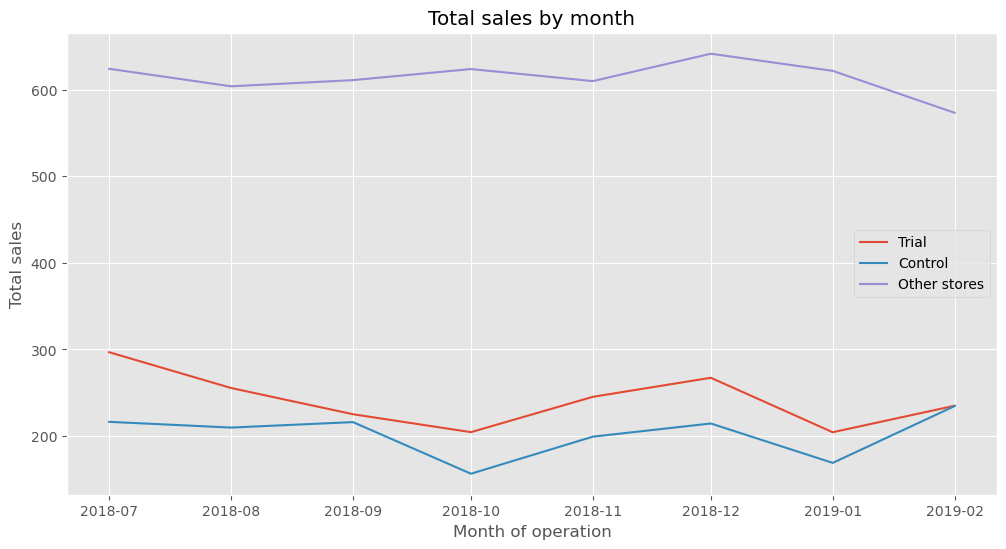

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Define your trial and control store numbers
trial_store = 77
control_store = 41

# Create a new column 'Store_type' in the DataFrame based on the store number
measureOverTime['Store_type'] = measureOverTime['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores'))

# Convert 'YEARMONTH' to a datetime object and store it in a new column 'TransactionMonth'
measureOverTime['TransactionMonth'] = measureOverTime['YEARMONTH'].dt.to_timestamp()

# Filter rows where 'YEARMONTH' is before March 2019
pastSales = measureOverTime[measureOverTime['TransactionMonth'] < pd.to_datetime('2019-03')]

# Group by 'TransactionMonth' and 'Store_type', and calculate the mean of 'totSales'
pastSales = pastSales.groupby(['TransactionMonth', 'Store_type'])['totSales'].mean().reset_index()

# Create a new figure
plt.figure(figsize=(12, 6))

# For each store type, plot total sales over time
for store_type in ['Trial', 'Control', 'Other stores']:
    data = pastSales[pastSales['Store_type'] == store_type]
    plt.plot(data['TransactionMonth'], data['totSales'], label=store_type)

# Set labels and title for the plot
plt.xlabel('Month of operation')
plt.ylabel('Total sales')
plt.title('Total sales by month')

# Display the legend
plt.legend()

# Show the plot
plt.show()



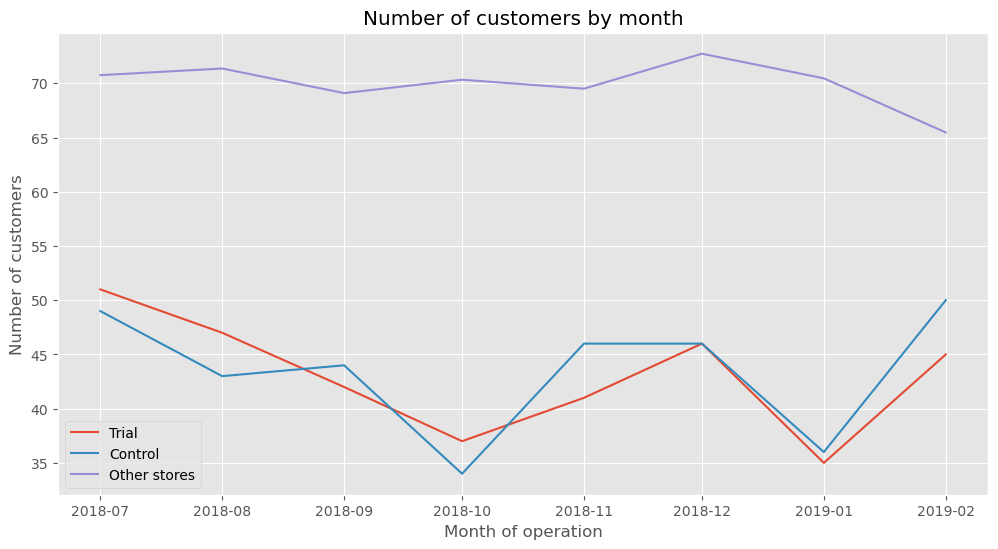

In [32]:
# Define your trial and control store numbers
trial_store = 77
control_store = 41

# Create a new column 'Store_type' in the DataFrame based on the store number
measureOverTime['Store_type'] = measureOverTime['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores'))

# Convert 'YEARMONTH' to a datetime object and store it in a new column 'TransactionMonth'
measureOverTime['TransactionMonth'] = measureOverTime['YEARMONTH'].dt.to_timestamp()

# Filter rows where 'YEARMONTH' is before March 2019
pastCustomers = measureOverTime[measureOverTime['TransactionMonth'] < pd.to_datetime('2019-03')]

# Group by 'TransactionMonth' and 'Store_type', and calculate the mean of 'nCustomers'
pastCustomers = pastCustomers.groupby(['TransactionMonth', 'Store_type'])['nCustomers'].mean().reset_index()

# Create a new figure
plt.figure(figsize=(12, 6))

# For each store type, plot total customers over time
for store_type in ['Trial', 'Control', 'Other stores']:
    data = pastCustomers[pastCustomers['Store_type'] == store_type]
    plt.plot(data['TransactionMonth'], data['nCustomers'], label=store_type)

# Set labels and title for the plot
plt.xlabel('Month of operation')
plt.ylabel('Number of customers')
plt.title('Number of customers by month')

# Display the legend
plt.legend()

# Show the plot
plt.show()



In [33]:
# Calculate the scaling factor for control sales
scalingFactorForControlSales = preTrialMeasures.loc[(preTrialMeasures['STORE_NBR'] == trial_store) & (preTrialMeasures['YEARMONTH'] < '2019-02'), 'totSales'].sum() / preTrialMeasures.loc[(preTrialMeasures['STORE_NBR'] == control_store) & (preTrialMeasures['YEARMONTH'] < '2019-02'), 'totSales'].sum()

# Apply the scaling factor to control store's sales
measureOverTimeSales = measureOverTime.copy()
scaledControlSales = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == control_store].copy()
scaledControlSales['controlSales'] = scaledControlSales['totSales'] * scalingFactorForControlSales


In [34]:
# Merge the trial store's sales data with the scaled control store's sales data
percentageDiff = pd.merge(measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == trial_store], scaledControlSales, on='YEARMONTH')

# Calculate the percentage difference
percentageDiff['percentageDiff'] = abs((percentageDiff['totSales_x'] - percentageDiff['controlSales']) / percentageDiff['controlSales'])


In [35]:
# Display the DataFrame
display(percentageDiff)

,STORE_NBR_x,YEARMONTH,totSales_x,nCustomers_x,nTxnPerCust_x,nChipsPerTxn_x,avgPricePerUnit_x,Store_type_x,TransactionMonth_x,STORE_NBR_y,totSales_y,nCustomers_y,nTxnPerCust_y,nChipsPerTxn_y,avgPricePerUnit_y,Store_type_y,TransactionMonth_y,controlSales,percentageDiff
0,77,2018-07,296.8,51,1.078431,1.527273,3.533333,Trial,2018-07-01,41,216.4,49,1.020408,1.220000,3.547541,Control,2018-07-01,266.114360,0.115310
1,77,2018-08,255.5,47,1.021277,1.541667,3.452703,Trial,2018-08-01,41,209.8,43,1.046512,1.288889,3.617241,Control,2018-08-01,257.998118,0.009683
2,77,2018-09,225.2,42,1.047619,1.590909,3.217143,Trial,2018-09-01,41,216.1,44,1.045455,1.260870,3.725862,Control,2018-09-01,265.745440,0.152572
3,77,2018-10,204.5,37,1.027027,1.368421,3.932692,Trial,2018-10-01,41,156.5,34,1.117647,1.210526,3.402174,Control,2018-10-01,192.453315,0.062595
4,77,2018-11,245.3,41,1.073171,1.522727,3.661194,Trial,2018-11-01,41,199.3,46,1.021739,1.276596,3.321667,Control,2018-11-01,245.085915,0.000874
5,77,2018-12,267.3,46,1.065217,1.469388,3.712500,Trial,2018-12-01,41,214.5,46,1.086957,1.260000,3.404762,Control,2018-12-01,263.777866,0.013353
6,77,2019-01,204.4,35,1.114286,1.666667,3.144615,Trial,2019-01-01,41,169.0,36,1.027778,1.216216,3.755556,Control,2019-01-01,207.824986,0.016480
7,77,2019-02,235.0,45,1.000000,1.644444,3.175676,Trial,2019-02-01,41,234.6,50,1.000000,1.380000,3.400000,Control,2019-02-01,288.495512,0.185429
8,77,2019-03,278.5,50,1.100000,1.490909,3.396341,Trial,2019-03-01,41,226.2,46,1.065217,1.367347,3.376119,Control,2019-03-01,278.165750,0.001202
9,77,2019-04,263.5,47,1.021277,1.625000,3.378205,Trial,2019-04-01,41,231.3,47,1.042553,1.326531,3.558462,Control,2019-04-01,284.437391,0.073610


In [36]:
import numpy as np
from scipy import stats

# Calculate the standard deviation of the percentage difference during the pre-trial period
stdDev = percentageDiff.loc[percentageDiff['YEARMONTH'] < '2019-02', 'percentageDiff'].std()

# Define the degrees of freedom
degreesOfFreedom = 7

# Calculate the t-values for the trial months
percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - 0) / stdDev

# Filter rows for the trial period
trial_period_tvalues = percentageDiff.loc[(percentageDiff['YEARMONTH'] >= '2019-02') & (percentageDiff['YEARMONTH'] <= '2019-04')]

# Print the t-values for the trial period
print(trial_period_tvalues)

# Calculate the 95th percentile of the t-distribution
critical_t_value = stats.t.ppf(1-0.05, df=degreesOfFreedom)

# Print the critical t-value
print("Critical t-value: ", critical_t_value)


   STORE_NBR_x YEARMONTH  totSales_x  nCustomers_x  nTxnPerCust_x  \
7           77   2019-02       235.0            45       1.000000   
8           77   2019-03       278.5            50       1.100000   
9           77   2019-04       263.5            47       1.021277   

   nChipsPerTxn_x  avgPricePerUnit_x Store_type_x TransactionMonth_x  \
7        1.644444           3.175676        Trial         2019-02-01   
8        1.490909           3.396341        Trial         2019-03-01   
9        1.625000           3.378205        Trial         2019-04-01   

   STORE_NBR_y  totSales_y  nCustomers_y  nTxnPerCust_y  nChipsPerTxn_y  \
7           41       234.6            50       1.000000        1.380000   
8           41       226.2            46       1.065217        1.367347   
9           41       231.3            47       1.042553        1.326531   

   avgPricePerUnit_y Store_type_y TransactionMonth_y  controlSales  \
7           3.400000      Control         2019-02-01    288.495

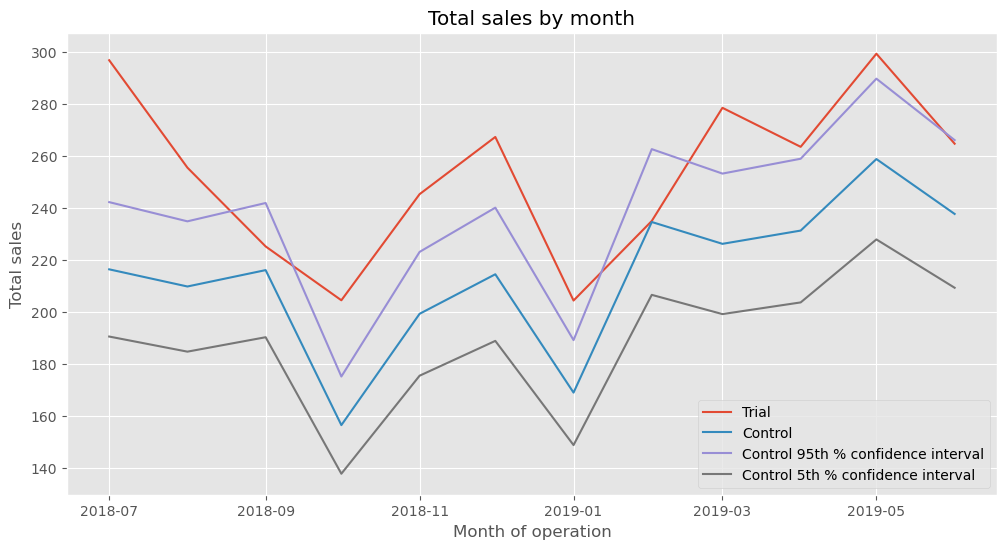

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Define your trial and control store numbers
trial_store = 77
control_store = 41

# Create a new column 'Store_type' in the DataFrame based on the store number
measureOverTimeSales['Store_type'] = measureOverTimeSales['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores'))

# Convert 'YEARMONTH' to a datetime object and store it in a new column 'TransactionMonth'
measureOverTimeSales['TransactionMonth'] = measureOverTimeSales['YEARMONTH'].dt.to_timestamp()

# Filter rows for trial and control stores
pastSales = measureOverTimeSales.loc[measureOverTimeSales['Store_type'].isin(['Trial', 'Control'])]

# Calculate control store's 95th percentile sales
pastSales_Controls95 = pastSales.loc[pastSales['Store_type'] == "Control"].copy()
pastSales_Controls95['totSales'] = pastSales_Controls95['totSales'] * (1 + stdDev * 2)
pastSales_Controls95['Store_type'] = "Control 95th % confidence interval"

# Calculate control store's 5th percentile sales
pastSales_Controls5 = pastSales.loc[pastSales['Store_type'] == "Control"].copy()
pastSales_Controls5['totSales'] = pastSales_Controls5['totSales'] * (1 - stdDev * 2)
pastSales_Controls5['Store_type'] = "Control 5th % confidence interval"

# Combine the data
trialAssessment = pd.concat([pastSales, pastSales_Controls95, pastSales_Controls5])

# Create a new figure
plt.figure(figsize=(12, 6))

# For each store type, plot total sales over time
for store_type in ['Trial', 'Control', 'Control 95th % confidence interval', 'Control 5th % confidence interval']:
    data = trialAssessment[trialAssessment['Store_type'] == store_type]
    plt.plot(data['TransactionMonth'], data['totSales'], label=store_type)

# Set labels and title for the plot
plt.xlabel('Month of operation')
plt.ylabel('Total sales')
plt.title('Total sales by month')

# Display the legend
plt.legend()

# Show the plot
plt.show()


In [41]:
# Calculate the scaling factor for control customers
scalingFactorForControlCust = preTrialMeasures.loc[(preTrialMeasures['STORE_NBR'] == trial_store) & (preTrialMeasures['YEARMONTH'] < '2019-02'), 'nCustomers'].sum() / preTrialMeasures.loc[(preTrialMeasures['STORE_NBR'] == control_store) & (preTrialMeasures['YEARMONTH'] < '2019-02'), 'nCustomers'].sum()

# Apply the scaling factor to control store's customer counts
measureOverTimeCusts = measureOverTime.copy()
scaledControlCustomers = measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR'] == control_store].copy()
scaledControlCustomers['controlCustomers'] = scaledControlCustomers['nCustomers'] * scalingFactorForControlCust

# Create a new column 'Store_type' in the DataFrame based on the store number
scaledControlCustomers['Store_type'] = scaledControlCustomers['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores'))

# Calculate the percentage difference between scaled control customers and trial customers
percentageDiff = pd.merge(measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR'] == trial_store], scaledControlCustomers, on='YEARMONTH')
percentageDiff['percentageDiff'] = abs((percentageDiff['nCustomers_x'] - percentageDiff['controlCustomers']) / percentageDiff['controlCustomers'])


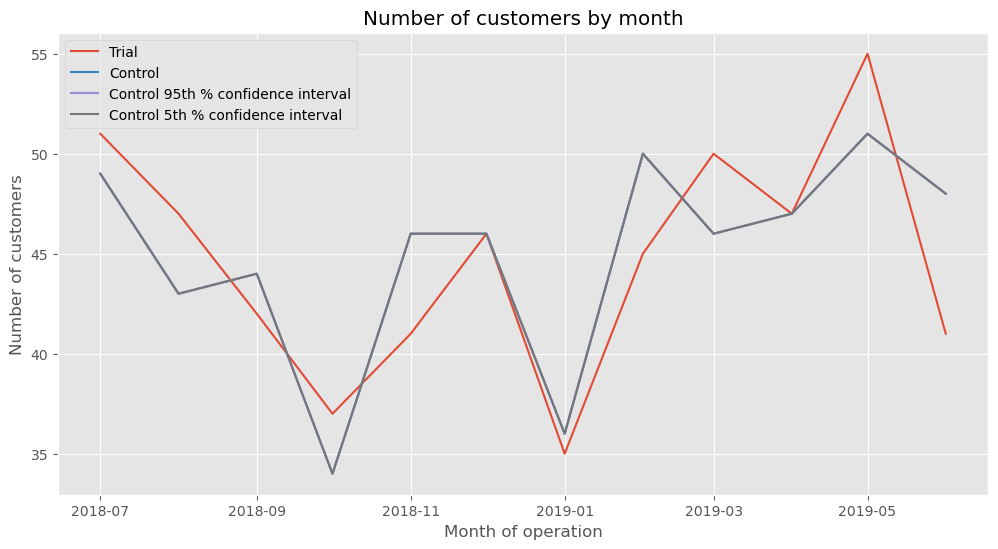

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 6))

# For each store type, plot total customers over time
for store_type in ['Trial', 'Control', 'Control 95th % confidence interval', 'Control 5th % confidence interval']:
    data = trialAssessment[trialAssessment['Store_type'] == store_type]
    ax.plot(data['TransactionMonth'], data['nCustomers'], label=store_type)

# Highlight the trial period
trial_start = pd.to_datetime('2019-02')
trial_end = pd.to_datetime('2019-04')
rect = patches.Rectangle((trial_start, 0), trial_end-trial_start, np.inf, linewidth=0, edgecolor='none', facecolor='gray', alpha=0.2)
ax.add_patch(rect)

# Set labels and title for the plot
plt.xlabel('Month of operation')
plt.ylabel('Number of customers')
plt.title('Number of customers by month')

# Display the legend
plt.legend()

# Show the plot
plt.show()


In [44]:
# store 86, all functions to recalculated

Retail_data.head(3)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEARMONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018-10
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018-09
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019-03


In [46]:
#calculating metrics as earlier done

# Group the data by store number and year-month
grouped_data = Retail_data.groupby(['STORE_NBR', 'YEARMONTH'])

# Total sales
totSales = grouped_data['TOT_SALES'].sum()

# Number of customers
nCustomers = grouped_data['LYLTY_CARD_NBR'].nunique()

# Transactions per customer
nTxnPerCust = grouped_data.size() / nCustomers

# Chips per transaction
nChipsPerTxn = grouped_data['PROD_QTY'].sum() / grouped_data.size()

# Average price per unit
avgPricePerUnit = totSales / grouped_data['PROD_QTY'].sum()

# Combine all measures into a single DataFrame
measureOverTime = pd.DataFrame({
    'totSales': totSales,
    'nCustomers': nCustomers,
    'nTxnPerCust': nTxnPerCust,
    'nChipsPerTxn': nChipsPerTxn,
    'avgPricePerUnit': avgPricePerUnit
}).reset_index()


In [47]:
# Filter to stores with full observation periods
storesWithFullObs = measureOverTime.groupby('STORE_NBR').filter(lambda x: len(x) == 12)['STORE_NBR'].unique()

# Filter to the pre-trial period
preTrialMeasures = measureOverTime[(measureOverTime['YEARMONTH'] < '2019-02') & (measureOverTime['STORE_NBR'].isin(storesWithFullObs))]


In [48]:
def calculate_correlation(inputTable, metricCol, storeComparison):
    # Initialize an empty DataFrame to store the correlation measures
    calcCorrTable = pd.DataFrame(columns=['Store1', 'Store2', 'corr_measure'])
    
    # Get the unique store numbers
    storeNumbers = inputTable['STORE_NBR'].unique()
    
    # Loop through each store number
    for i in storeNumbers:
        # Get the data for the trial store and the current store
        store1_data = inputTable[inputTable['STORE_NBR'] == storeComparison][metricCol]
        store2_data = inputTable[inputTable['STORE_NBR'] == i][metricCol]
        
        # If the trial store and current store have different numbers of data points, skip to the next iteration
        if len(store1_data) != len(store2_data):
            continue
        
        # Calculate the correlation measure between the trial store and current store
        corr_measure = np.corrcoef(store1_data, store2_data)[0, 1]
        
        # Create a DataFrame with the trial store number, current store number, and correlation measure
        calculatedMeasure = pd.DataFrame({"Store1": [storeComparison], "Store2": [i], "corr_measure": [corr_measure]})
        
        # Append the calculated measure to the correlation table
        calcCorrTable = pd.concat([calcCorrTable, calculatedMeasure], ignore_index=True)
    
    # Return the correlation table
    return calcCorrTable


In [49]:
# calling the calcCorrTable
output = calculate_correlation(measureOverTime, 'totSales', 86)

# To view the output
print(output)

    Store1 Store2  corr_measure
0       86      1      0.343541
1       86      2      0.001103
2       86      3      0.178180
3       86      4     -0.179046
4       86      5     -0.321841
..     ...    ...           ...
255     86    268     -0.278549
256     86    269      0.155744
257     86    270     -0.358782
258     86    271     -0.013922
259     86    272      0.230625

[260 rows x 3 columns]


In [50]:
def calculate_magnitude_distance(inputTable, metricCol, storeComparison):
    # Initialize an empty DataFrame to store the magnitude distances
    calcDistTable = pd.DataFrame(columns=['Store1', 'Store2', 'YEARMONTH', 'measure'])
    
    # Get the unique store numbers
    storeNumbers = inputTable['STORE_NBR'].unique()
    
    # Loop through each store number
    for i in storeNumbers:
        # Get the data for the trial store and the current store
        store1_data = inputTable[inputTable['STORE_NBR'] == storeComparison]
        store2_data = inputTable[inputTable['STORE_NBR'] == i]

        # Merge store1_data and store2_data on 'YEARMONTH'
        merged_data = pd.merge(store1_data, store2_data, on='YEARMONTH', suffixes=('_store1', '_store2'))

        # Calculate the absolute difference measure between the trial store and current store
        measure = abs(merged_data[metricCol + '_store1'].values - merged_data[metricCol + '_store2'].values)

        # Create a DataFrame with the trial store number, current store number, year-month, and measure
        calculatedMeasure = pd.DataFrame({
            "Store1": [storeComparison] * len(measure),
            "Store2": [i] * len(measure),
            "YEARMONTH": merged_data['YEARMONTH'].values,
            "measure": measure
    })

        
        # Append the calculated measure to the magnitude distance table
        calcDistTable = pd.concat([calcDistTable, calculatedMeasure], ignore_index=True)
    
    # Return the magnitude distance table
    return calcDistTable


In [51]:
# Using 'Retail_data' is your DataFrame, 'TOT_SALES' is the metric column, and 77 is the trial store number
output = calculate_magnitude_distance(measureOverTime, 'totSales', 86)

# To view the output
print(output)


     Store1 Store2 YEARMONTH  measure
0        86      1   2018-07   685.30
1        86      1   2018-08   587.95
2        86      1   2018-09   635.80
3        86      1   2018-10   760.30
4        86      1   2018-11   725.40
...     ...    ...       ...      ...
3164     86    272   2019-02   517.70
3165     86    272   2019-03   584.50
3166     86    272   2019-04   403.10
3167     86    272   2019-05   574.70
3168     86    272   2019-06   525.90

[3169 rows x 4 columns]


In [52]:
def calculate_magnitude_distance(inputTable, metricCol, storeComparison):
    # Initialize an empty DataFrame to store the magnitude distances
    calcDistTable = pd.DataFrame(columns=['Store1', 'Store2', 'YEARMONTH', 'measure'])
    
    # Get the unique store numbers
    storeNumbers = inputTable['STORE_NBR'].unique()
    
    # Loop through each store number
    for i in storeNumbers:
        # Get the data for the trial store and the current store
        store1_data = inputTable[inputTable['STORE_NBR'] == storeComparison]
        store2_data = inputTable[inputTable['STORE_NBR'] == i]

        # Merge store1_data and store2_data on 'YEARMONTH'
        merged_data = pd.merge(store1_data, store2_data, on='YEARMONTH', suffixes=('_store1', '_store2'))

        # Calculate the absolute difference measure between the trial store and current store
        measure = abs(merged_data[metricCol + '_store1'].values - merged_data[metricCol + '_store2'].values)

        # Create a DataFrame with the trial store number, current store number, year-month, and measure
        calculatedMeasure = pd.DataFrame({
            "Store1": [storeComparison] * len(measure),
            "Store2": [i] * len(measure),
            "YEARMONTH": merged_data['YEARMONTH'].values,
            "measure": measure
    })
        
        # Append the calculated measure to the magnitude distance table
        calcDistTable = pd.concat([calcDistTable, calculatedMeasure], ignore_index=True)
    
    # Calculate min and max of measure for each Store1 and YEARMONTH combination
    minMaxDist = calcDistTable.groupby(['Store1', 'YEARMONTH'])['measure'].agg(['min', 'max']).reset_index()
    
    # Merge minMaxDist with calcDistTable
    distTable = pd.merge(calcDistTable, minMaxDist, on=['Store1', 'YEARMONTH'])
    
    # Standardise the magnitude distance so that it ranges from 0 to 1
    distTable['magnitudeMeasure'] = 1 - (distTable['measure'] - distTable['min']) / (distTable['max'] - distTable['min'])
    
    # Calculate mean of magnitudeMeasure for each Store1 and Store2 combination
    finalDistTable = distTable.groupby(['Store1', 'Store2'])['magnitudeMeasure'].mean().reset_index()
    
    # Return the final distance table
    return finalDistTable

In [53]:
#getting finalDistTable
output = calculate_magnitude_distance(measureOverTime, 'totSales', 86)

# To view the output
print(output)

     Store1  Store2  magnitudeMeasure
0        86       1          0.221761
1        86       2          0.185926
2        86       3          0.790142
3        86       4          0.606213
4        86       5          0.876997
..      ...     ...               ...
267      86     268          0.243549
268      86     269          0.905667
269      86     270          0.879990
270      86     271          0.887844
271      86     272          0.436339

[272 rows x 3 columns]


In [54]:
# Having 'Retail_data' DataFrame, 'TOT_SALES' is the metric column, and 86 is the trial store number
corrTable = calculate_correlation(measureOverTime, 'totSales', 86)
distTable = calculate_magnitude_distance(measureOverTime, 'totSales', 86)

# Merge corrTable and distTable
combinedTable = pd.merge(corrTable, distTable, on=['Store1', 'Store2'], suffixes=('_corr', '_dist'))

# Calculate the combined score
combinedTable['score'] = 0.5 * combinedTable['corr_measure'] + 0.5 * combinedTable['magnitudeMeasure']

# To view the output
print(combinedTable)

    Store1 Store2  corr_measure  magnitudeMeasure     score
0       86      1      0.343541          0.221761  0.282651
1       86      2      0.001103          0.185926  0.093515
2       86      3      0.178180          0.790142  0.484161
3       86      4     -0.179046          0.606213  0.213584
4       86      5     -0.321841          0.876997  0.277578
..     ...    ...           ...               ...       ...
255     86    268     -0.278549          0.243549 -0.017500
256     86    269      0.155744          0.905667  0.530705
257     86    270     -0.358782          0.879990  0.260604
258     86    271     -0.013922          0.887844  0.436961
259     86    272      0.230625          0.436339  0.333482

[260 rows x 5 columns]


In [55]:
# Using 'measureOverTime' DataFrame, 'totSales' and 'nCustomers' are the metric columns, and 86 is the trial store number
score_nSales = calculate_correlation(measureOverTime, 'totSales', 86)
score_nCustomers = calculate_correlation(measureOverTime, 'nCustomers', 86)

# Merge score_nSales and score_nCustomers
score_Control = pd.merge(score_nSales, score_nCustomers, on=['Store1', 'Store2'], suffixes=('_nSales', '_nCustomers'))

# Calculate the combined score
score_Control['finalControlScore'] = 0.5 * score_Control['corr_measure_nSales'] + 0.5 * score_Control['corr_measure_nCustomers']

# To view the output
print(score_Control)

    Store1 Store2  corr_measure_nSales  corr_measure_nCustomers  \
0       86      1             0.343541                 0.358400   
1       86      2             0.001103                 0.092858   
2       86      3             0.178180                -0.027294   
3       86      4            -0.179046                -0.338958   
4       86      5            -0.321841                -0.622949   
..     ...    ...                  ...                      ...   
255     86    268            -0.278549                 0.070937   
256     86    269             0.155744                -0.382017   
257     86    270            -0.358782                -0.580188   
258     86    271            -0.013922                -0.468858   
259     86    272             0.230625                 0.188641   

     finalControlScore  
0             0.350970  
1             0.046981  
2             0.075443  
3            -0.259002  
4            -0.472395  
..                 ...  
255          -0.1038

In [56]:
#selecting control_store
# Having 'score_Control' DataFrame and 86 is the trial store number
control_store = score_Control[(score_Control['Store1'] == 86) & (score_Control['Store2'] != 86)].nlargest(1, 'finalControlScore')['Store2'].values[0]

# To view the control store
print(control_store)

229


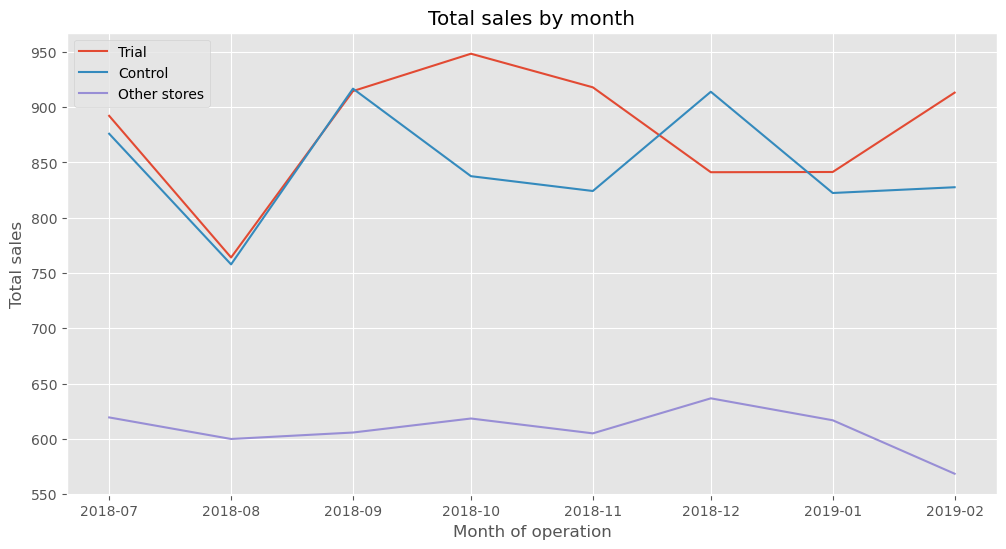

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Define your trial and control store numbers
trial_store = 86
control_store = 229

# Create a new column 'Store_type' in the DataFrame based on the store number
measureOverTime['Store_type'] = measureOverTime['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores'))

# Convert 'YEARMONTH' to a datetime object and store it in a new column 'TransactionMonth'
measureOverTime['TransactionMonth'] = measureOverTime['YEARMONTH'].dt.to_timestamp()

# Filter rows where 'YEARMONTH' is before March 2019
pastSales = measureOverTime[measureOverTime['TransactionMonth'] < pd.to_datetime('2019-03')]

# Group by 'TransactionMonth' and 'Store_type', and calculate the mean of 'totSales'
pastSales = pastSales.groupby(['TransactionMonth', 'Store_type'])['totSales'].mean().reset_index()

# Create a new figure
plt.figure(figsize=(12, 6))

# For each store type, plot total sales over time
for store_type in ['Trial', 'Control', 'Other stores']:
    data = pastSales[pastSales['Store_type'] == store_type]
    plt.plot(data['TransactionMonth'], data['totSales'], label=store_type)

# Set labels and title for the plot
plt.xlabel('Month of operation')
plt.ylabel('Total sales')
plt.title('Total sales by month')

# Display the legend
plt.legend()

# Show the plot
plt.show()


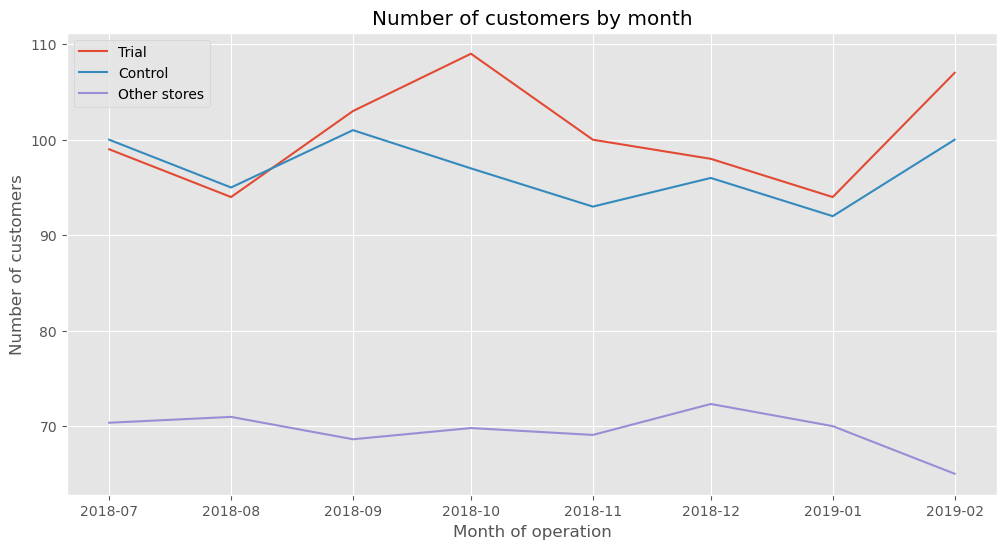

In [63]:
# Define your trial and control store numbers
trial_store = 86
control_store = 229

# Create a new column 'Store_type' in the DataFrame based on the store number
measureOverTime['Store_type'] = measureOverTime['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores'))

# Convert 'YEARMONTH' to a datetime object and store it in a new column 'TransactionMonth'
measureOverTime['TransactionMonth'] = measureOverTime['YEARMONTH'].dt.to_timestamp()

# Filter rows where 'YEARMONTH' is before March 2019
pastCustomers = measureOverTime[measureOverTime['TransactionMonth'] < pd.to_datetime('2019-03')]

# Group by 'TransactionMonth' and 'Store_type', and calculate the mean of 'nCustomers'
pastCustomers = pastCustomers.groupby(['TransactionMonth', 'Store_type'])['nCustomers'].mean().reset_index()

# Create a new figure
plt.figure(figsize=(12, 6))

# For each store type, plot total customers over time
for store_type in ['Trial', 'Control', 'Other stores']:
    data = pastCustomers[pastCustomers['Store_type'] == store_type]
    plt.plot(data['TransactionMonth'], data['nCustomers'], label=store_type)

# Set labels and title for the plot
plt.xlabel('Month of operation')
plt.ylabel('Number of customers')
plt.title('Number of customers by month')

# Display the legend
plt.legend()

# Show the plot
plt.show()


In [64]:
# Calculate the scaling factor for control sales
scalingFactorForControlSales = preTrialMeasures.loc[(preTrialMeasures['STORE_NBR'] == trial_store) & (preTrialMeasures['YEARMONTH'] < '2019-02'), 'totSales'].sum() / preTrialMeasures.loc[(preTrialMeasures['STORE_NBR'] == control_store) & (preTrialMeasures['YEARMONTH'] < '2019-02'), 'totSales'].sum()

# Apply the scaling factor to control store's sales
measureOverTimeSales = measureOverTime.copy()
scaledControlSales = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == control_store].copy()
scaledControlSales['controlSales'] = scaledControlSales['totSales'] * scalingFactorForControlSales


In [65]:
# Merge the trial store's sales data with the scaled control store's sales data
percentageDiff = pd.merge(measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == trial_store], scaledControlSales, on='YEARMONTH')

# Calculate the percentage difference
percentageDiff['percentageDiff'] = abs((percentageDiff['totSales_x'] - percentageDiff['controlSales']) / percentageDiff['controlSales'])


In [66]:
# Display the DataFrame
display(percentageDiff)

,STORE_NBR_x,YEARMONTH,totSales_x,nCustomers_x,nTxnPerCust_x,nChipsPerTxn_x,avgPricePerUnit_x,Store_type_x,TransactionMonth_x,STORE_NBR_y,totSales_y,nCustomers_y,nTxnPerCust_y,nChipsPerTxn_y,avgPricePerUnit_y,Store_type_y,TransactionMonth_y,controlSales,percentageDiff
0,86,2018-07,892.20,99,1.272727,1.992063,3.554582,Trial,2018-07-01,229,876.0,100,1.240000,2.000000,3.532258,Control,2018-07-01,901.188240,0.009974
1,86,2018-08,764.05,94,1.191489,1.919643,3.553721,Trial,2018-08-01,229,757.8,95,1.231579,1.914530,3.383036,Control,2018-08-01,779.589553,0.019933
2,86,2018-09,914.60,103,1.252427,2.000000,3.544961,Trial,2018-09-01,229,916.8,101,1.287129,2.000000,3.526154,Control,2018-09-01,943.161391,0.030283
3,86,2018-10,948.40,109,1.266055,2.000000,3.436232,Trial,2018-10-01,229,837.6,97,1.298969,2.000000,3.323810,Control,2018-10-01,861.684098,0.100635
4,86,2018-11,918.00,100,1.270000,2.000000,3.614173,Trial,2018-11-01,229,824.2,93,1.290323,2.000000,3.434167,Control,2018-11-01,847.898798,0.082676
5,86,2018-12,841.20,98,1.224490,2.000000,3.505000,Trial,2018-12-01,229,914.0,96,1.333333,2.000000,3.570312,Control,2018-12-01,940.280880,0.105374
6,86,2019-01,841.40,94,1.382979,2.000000,3.236154,Trial,2019-01-01,229,822.4,92,1.293478,2.000000,3.455462,Control,2019-01-01,846.047041,0.005493
7,86,2019-02,913.20,107,1.299065,1.992806,3.296751,Trial,2019-02-01,229,827.6,100,1.180000,2.000000,3.506780,Control,2019-02-01,851.396561,0.072591
8,86,2019-03,1026.80,115,1.234783,2.000000,3.615493,Trial,2019-03-01,229,1031.8,112,1.321429,2.000000,3.485811,Control,2019-03-01,1061.468066,0.032660
9,86,2019-04,848.20,105,1.209524,2.000000,3.339370,Trial,2019-04-01,229,914.6,101,1.287129,2.000000,3.517692,Control,2019-04-01,940.898132,0.098521


In [67]:
import numpy as np
from scipy import stats

# Calculate the standard deviation of the percentage difference during the pre-trial period
stdDev = percentageDiff.loc[percentageDiff['YEARMONTH'] < '2019-02', 'percentageDiff'].std()

# Define the degrees of freedom
degreesOfFreedom = 7

# Calculate the t-values for the trial months
percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - 0) / stdDev

# Filter rows for the trial period
trial_period_tvalues = percentageDiff.loc[(percentageDiff['YEARMONTH'] >= '2019-02') & (percentageDiff['YEARMONTH'] <= '2019-04')]

# Print the t-values for the trial period
print(trial_period_tvalues)

# Calculate the 95th percentile of the t-distribution
critical_t_value = stats.t.ppf(1-0.05, df=degreesOfFreedom)

# Print the critical t-value
print("Critical t-value: ", critical_t_value)


   STORE_NBR_x YEARMONTH  totSales_x  nCustomers_x  nTxnPerCust_x  \
7           86   2019-02       913.2           107       1.299065   
8           86   2019-03      1026.8           115       1.234783   
9           86   2019-04       848.2           105       1.209524   

   nChipsPerTxn_x  avgPricePerUnit_x Store_type_x TransactionMonth_x  \
7        1.992806           3.296751        Trial         2019-02-01   
8        2.000000           3.615493        Trial         2019-03-01   
9        2.000000           3.339370        Trial         2019-04-01   

   STORE_NBR_y  totSales_y  nCustomers_y  nTxnPerCust_y  nChipsPerTxn_y  \
7          229       827.6           100       1.180000             2.0   
8          229      1031.8           112       1.321429             2.0   
9          229       914.6           101       1.287129             2.0   

   avgPricePerUnit_y Store_type_y TransactionMonth_y  controlSales  \
7           3.506780      Control         2019-02-01    851.396

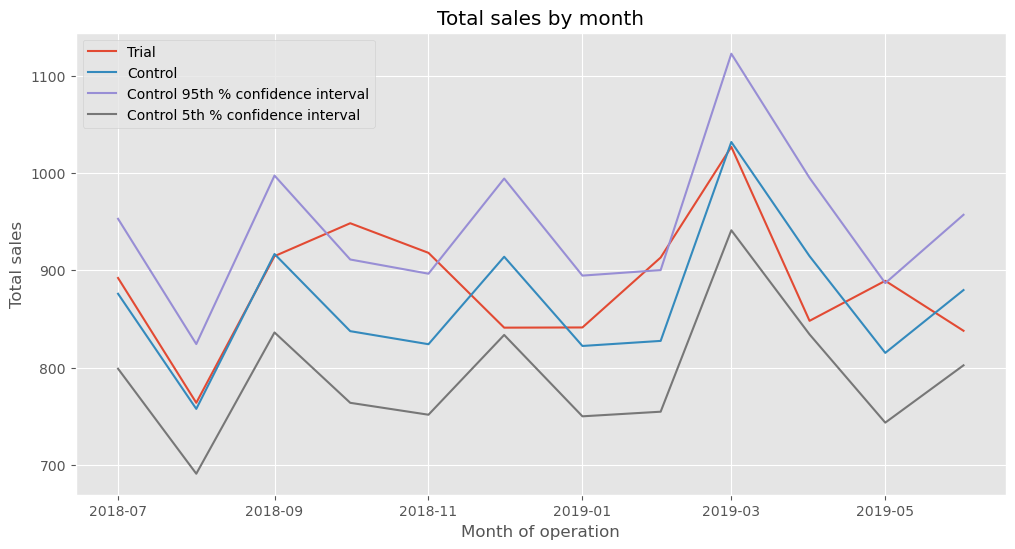

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Define your trial and control store numbers
trial_store = 86
control_store = 229

# Create a new column 'Store_type' in the DataFrame based on the store number
measureOverTimeSales['Store_type'] = measureOverTimeSales['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores'))

# Convert 'YEARMONTH' to a datetime object and store it in a new column 'TransactionMonth'
measureOverTimeSales['TransactionMonth'] = measureOverTimeSales['YEARMONTH'].dt.to_timestamp()

# Filter rows for trial and control stores
pastSales = measureOverTimeSales.loc[measureOverTimeSales['Store_type'].isin(['Trial', 'Control'])]

# Calculate control store's 95th percentile sales
pastSales_Controls95 = pastSales.loc[pastSales['Store_type'] == "Control"].copy()
pastSales_Controls95['totSales'] = pastSales_Controls95['totSales'] * (1 + stdDev * 2)
pastSales_Controls95['Store_type'] = "Control 95th % confidence interval"

# Calculate control store's 5th percentile sales
pastSales_Controls5 = pastSales.loc[pastSales['Store_type'] == "Control"].copy()
pastSales_Controls5['totSales'] = pastSales_Controls5['totSales'] * (1 - stdDev * 2)
pastSales_Controls5['Store_type'] = "Control 5th % confidence interval"

# Combine the data
trialAssessment = pd.concat([pastSales, pastSales_Controls95, pastSales_Controls5])

# Create a new figure
plt.figure(figsize=(12, 6))

# For each store type, plot total sales over time
for store_type in ['Trial', 'Control', 'Control 95th % confidence interval', 'Control 5th % confidence interval']:
    data = trialAssessment[trialAssessment['Store_type'] == store_type]
    plt.plot(data['TransactionMonth'], data['totSales'], label=store_type)

# Set labels and title for the plot
plt.xlabel('Month of operation')
plt.ylabel('Total sales')
plt.title('Total sales by month')

# Display the legend
plt.legend()

# Show the plot
plt.show()

In [71]:
# Calculate the scaling factor for control customers
scalingFactorForControlCust = preTrialMeasures.loc[(preTrialMeasures['STORE_NBR'] == trial_store) & (preTrialMeasures['YEARMONTH'] < '2019-02'), 'nCustomers'].sum() / preTrialMeasures.loc[(preTrialMeasures['STORE_NBR'] == control_store) & (preTrialMeasures['YEARMONTH'] < '2019-02'), 'nCustomers'].sum()

# Apply the scaling factor to control store's customer counts
measureOverTimeCusts = measureOverTime.copy()
scaledControlCustomers = measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR'] == control_store].copy()
scaledControlCustomers['controlCustomers'] = scaledControlCustomers['nCustomers'] * scalingFactorForControlCust

# Create a new column 'Store_type' in the DataFrame based on the store number
scaledControlCustomers['Store_type'] = scaledControlCustomers['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores'))

# Calculate the percentage difference between scaled control customers and trial customers
percentageDiff = pd.merge(measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR'] == trial_store], scaledControlCustomers, on='YEARMONTH')
percentageDiff['percentageDiff'] = abs((percentageDiff['nCustomers_x'] - percentageDiff['controlCustomers']) / percentageDiff['controlCustomers'])


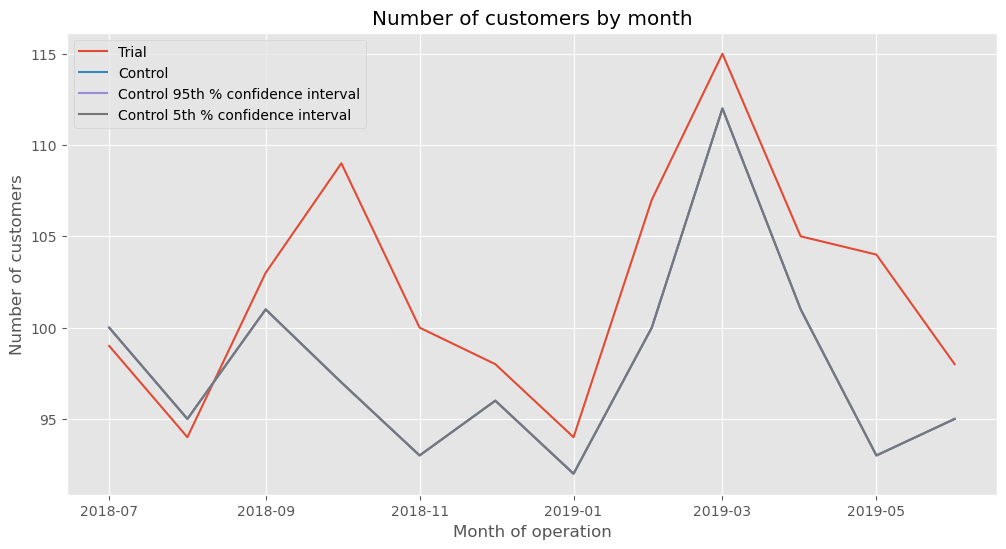

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 6))

# For each store type, plot total customers over time
for store_type in ['Trial', 'Control', 'Control 95th % confidence interval', 'Control 5th % confidence interval']:
    data = trialAssessment[trialAssessment['Store_type'] == store_type]
    ax.plot(data['TransactionMonth'], data['nCustomers'], label=store_type)

# Highlight the trial period
trial_start = pd.to_datetime('2019-02')
trial_end = pd.to_datetime('2019-04')
rect = patches.Rectangle((trial_start, 0), trial_end-trial_start, np.inf, linewidth=0, edgecolor='none', facecolor='gray', alpha=0.2)
ax.add_patch(rect)

# Set labels and title for the plot
plt.xlabel('Month of operation')
plt.ylabel('Number of customers')
plt.title('Number of customers by month')

# Display the legend
plt.legend()

# Show the plot
plt.show()


In [73]:
# Trial store 88

#calculating metrics as earlier done

# Group the data by store number and year-month
grouped_data = Retail_data.groupby(['STORE_NBR', 'YEARMONTH'])

# Total sales
totSales = grouped_data['TOT_SALES'].sum()

# Number of customers
nCustomers = grouped_data['LYLTY_CARD_NBR'].nunique()

# Transactions per customer
nTxnPerCust = grouped_data.size() / nCustomers

# Chips per transaction
nChipsPerTxn = grouped_data['PROD_QTY'].sum() / grouped_data.size()

# Average price per unit
avgPricePerUnit = totSales / grouped_data['PROD_QTY'].sum()

# Combine all measures into a single DataFrame
measureOverTime = pd.DataFrame({
    'totSales': totSales,
    'nCustomers': nCustomers,
    'nTxnPerCust': nTxnPerCust,
    'nChipsPerTxn': nChipsPerTxn,
    'avgPricePerUnit': avgPricePerUnit
}).reset_index()


In [74]:
# Filter to stores with full observation periods
storesWithFullObs = measureOverTime.groupby('STORE_NBR').filter(lambda x: len(x) == 12)['STORE_NBR'].unique()

# Filter to the pre-trial period
preTrialMeasures = measureOverTime[(measureOverTime['YEARMONTH'] < '2019-02') & (measureOverTime['STORE_NBR'].isin(storesWithFullObs))]


In [75]:
def calculate_correlation(inputTable, metricCol, storeComparison):
    # Initialize an empty DataFrame to store the correlation measures
    calcCorrTable = pd.DataFrame(columns=['Store1', 'Store2', 'corr_measure'])
    
    # Get the unique store numbers
    storeNumbers = inputTable['STORE_NBR'].unique()
    
    # Loop through each store number
    for i in storeNumbers:
        # Get the data for the trial store and the current store
        store1_data = inputTable[inputTable['STORE_NBR'] == storeComparison][metricCol]
        store2_data = inputTable[inputTable['STORE_NBR'] == i][metricCol]
        
        # If the trial store and current store have different numbers of data points, skip to the next iteration
        if len(store1_data) != len(store2_data):
            continue
        
        # Calculate the correlation measure between the trial store and current store
        corr_measure = np.corrcoef(store1_data, store2_data)[0, 1]
        
        # Create a DataFrame with the trial store number, current store number, and correlation measure
        calculatedMeasure = pd.DataFrame({"Store1": [storeComparison], "Store2": [i], "corr_measure": [corr_measure]})
        
        # Append the calculated measure to the correlation table
        calcCorrTable = pd.concat([calcCorrTable, calculatedMeasure], ignore_index=True)
    
    # Return the correlation table
    return calcCorrTable

In [76]:
# calling the calcCorrTable
output = calculate_correlation(measureOverTime, 'totSales', 88)

# To view the output
print(output)

    Store1 Store2  corr_measure
0       88      1      0.370530
1       88      2      0.284244
2       88      3     -0.207674
3       88      4     -0.319831
4       88      5     -0.325116
..     ...    ...           ...
255     88    268     -0.137395
256     88    269     -0.209881
257     88    270     -0.320541
258     88    271     -0.284165
259     88    272      0.108279

[260 rows x 3 columns]


In [77]:
def calculate_magnitude_distance(inputTable, metricCol, storeComparison):
    # Initialize an empty DataFrame to store the magnitude distances
    calcDistTable = pd.DataFrame(columns=['Store1', 'Store2', 'YEARMONTH', 'measure'])
    
    # Get the unique store numbers
    storeNumbers = inputTable['STORE_NBR'].unique()
    
    # Loop through each store number
    for i in storeNumbers:
        # Get the data for the trial store and the current store
        store1_data = inputTable[inputTable['STORE_NBR'] == storeComparison]
        store2_data = inputTable[inputTable['STORE_NBR'] == i]

        # Merge store1_data and store2_data on 'YEARMONTH'
        merged_data = pd.merge(store1_data, store2_data, on='YEARMONTH', suffixes=('_store1', '_store2'))

        # Calculate the absolute difference measure between the trial store and current store
        measure = abs(merged_data[metricCol + '_store1'].values - merged_data[metricCol + '_store2'].values)

        # Create a DataFrame with the trial store number, current store number, year-month, and measure
        calculatedMeasure = pd.DataFrame({
            "Store1": [storeComparison] * len(measure),
            "Store2": [i] * len(measure),
            "YEARMONTH": merged_data['YEARMONTH'].values,
            "measure": measure
    })

        
        # Append the calculated measure to the magnitude distance table
        calcDistTable = pd.concat([calcDistTable, calculatedMeasure], ignore_index=True)
    
    # Return the magnitude distance table
    return calcDistTable


In [78]:
# Using 'Retail_data' is your DataFrame, 'TOT_SALES' is the metric column, and 77 is the trial store number
output = calculate_magnitude_distance(measureOverTime, 'totSales', 88)

# To view the output
print(output)

     Store1 Store2 YEARMONTH  measure
0        88      1   2018-07  1103.10
1        88      1   2018-08  1147.70
2        88      1   2018-09  1144.20
3        88      1   2018-10  1164.30
4        88      1   2018-11  1190.20
...     ...    ...       ...      ...
3164     88    272   2019-02   974.70
3165     88    272   2019-03  1034.90
3166     88    272   2019-04   994.30
3167     88    272   2019-05   993.65
3168     88    272   2019-06  1042.50

[3169 rows x 4 columns]


In [79]:
def calculate_magnitude_distance(inputTable, metricCol, storeComparison):
    # Initialize an empty DataFrame to store the magnitude distances
    calcDistTable = pd.DataFrame(columns=['Store1', 'Store2', 'YEARMONTH', 'measure'])
    
    # Get the unique store numbers
    storeNumbers = inputTable['STORE_NBR'].unique()
    
    # Loop through each store number
    for i in storeNumbers:
        # Get the data for the trial store and the current store
        store1_data = inputTable[inputTable['STORE_NBR'] == storeComparison]
        store2_data = inputTable[inputTable['STORE_NBR'] == i]

        # Merge store1_data and store2_data on 'YEARMONTH'
        merged_data = pd.merge(store1_data, store2_data, on='YEARMONTH', suffixes=('_store1', '_store2'))

        # Calculate the absolute difference measure between the trial store and current store
        measure = abs(merged_data[metricCol + '_store1'].values - merged_data[metricCol + '_store2'].values)

        # Create a DataFrame with the trial store number, current store number, year-month, and measure
        calculatedMeasure = pd.DataFrame({
            "Store1": [storeComparison] * len(measure),
            "Store2": [i] * len(measure),
            "YEARMONTH": merged_data['YEARMONTH'].values,
            "measure": measure
    })
        
        # Append the calculated measure to the magnitude distance table
        calcDistTable = pd.concat([calcDistTable, calculatedMeasure], ignore_index=True)
    
    # Calculate min and max of measure for each Store1 and YEARMONTH combination
    minMaxDist = calcDistTable.groupby(['Store1', 'YEARMONTH'])['measure'].agg(['min', 'max']).reset_index()
    
    # Merge minMaxDist with calcDistTable
    distTable = pd.merge(calcDistTable, minMaxDist, on=['Store1', 'YEARMONTH'])
    
    # Standardise the magnitude distance so that it ranges from 0 to 1
    distTable['magnitudeMeasure'] = 1 - (distTable['measure'] - distTable['min']) / (distTable['max'] - distTable['min'])
    
    # Calculate mean of magnitudeMeasure for each Store1 and Store2 combination
    finalDistTable = distTable.groupby(['Store1', 'Store2'])['magnitudeMeasure'].mean().reset_index()
    
    # Return the final distance table
    return finalDistTable

In [80]:
#getting finalDistTable
output = calculate_magnitude_distance(measureOverTime, 'totSales', 88)

# To view the output
print(output)

     Store1  Store2  magnitudeMeasure
0        88       1          0.143908
1        88       2          0.120222
2        88       3          0.785124
3        88       4          0.854167
4        88       5          0.582200
..      ...     ...               ...
267      88     268          0.157188
268      88     269          0.687782
269      88     270          0.692583
270      88     271          0.595754
271      88     272          0.283141

[272 rows x 3 columns]


In [81]:
# Having 'Retail_data' DataFrame, 'TOT_SALES' is the metric column, and 86 is the trial store number
corrTable = calculate_correlation(measureOverTime, 'totSales', 88)
distTable = calculate_magnitude_distance(measureOverTime, 'totSales', 88)

# Merge corrTable and distTable
combinedTable = pd.merge(corrTable, distTable, on=['Store1', 'Store2'], suffixes=('_corr', '_dist'))

# Calculate the combined score
combinedTable['score'] = 0.5 * combinedTable['corr_measure'] + 0.5 * combinedTable['magnitudeMeasure']

# To view the output
print(combinedTable)

    Store1 Store2  corr_measure  magnitudeMeasure     score
0       88      1      0.370530          0.143908  0.257219
1       88      2      0.284244          0.120222  0.202233
2       88      3     -0.207674          0.785124  0.288725
3       88      4     -0.319831          0.854167  0.267168
4       88      5     -0.325116          0.582200  0.128542
..     ...    ...           ...               ...       ...
255     88    268     -0.137395          0.157188  0.009897
256     88    269     -0.209881          0.687782  0.238951
257     88    270     -0.320541          0.692583  0.186021
258     88    271     -0.284165          0.595754  0.155795
259     88    272      0.108279          0.283141  0.195710

[260 rows x 5 columns]


In [82]:
# Using 'measureOverTime' DataFrame, 'totSales' and 'nCustomers' are the metric columns, and 86 is the trial store number
score_nSales = calculate_correlation(measureOverTime, 'totSales', 88)
score_nCustomers = calculate_correlation(measureOverTime, 'nCustomers', 88)

# Merge score_nSales and score_nCustomers
score_Control = pd.merge(score_nSales, score_nCustomers, on=['Store1', 'Store2'], suffixes=('_nSales', '_nCustomers'))

# Calculate the combined score
score_Control['finalControlScore'] = 0.5 * score_Control['corr_measure_nSales'] + 0.5 * score_Control['corr_measure_nCustomers']

# To view the output
print(score_Control)

    Store1 Store2  corr_measure_nSales  corr_measure_nCustomers  \
0       88      1             0.370530                 0.198687   
1       88      2             0.284244                 0.156889   
2       88      3            -0.207674                 0.164293   
3       88      4            -0.319831                -0.128706   
4       88      5            -0.325116                -0.434707   
..     ...    ...                  ...                      ...   
255     88    268            -0.137395                 0.679420   
256     88    269            -0.209881                -0.256790   
257     88    270            -0.320541                -0.067428   
258     88    271            -0.284165                -0.450137   
259     88    272             0.108279                 0.294726   

     finalControlScore  
0             0.284608  
1             0.220567  
2            -0.021691  
3            -0.224268  
4            -0.379911  
..                 ...  
255           0.2710

In [83]:
#selecting control_store
# Having 'score_Control' DataFrame and 86 is the trial store number
control_store = score_Control[(score_Control['Store1'] == 88) & (score_Control['Store2'] != 88)].nlargest(1, 'finalControlScore')['Store2'].values[0]

# To view the control store
print(control_store)

178


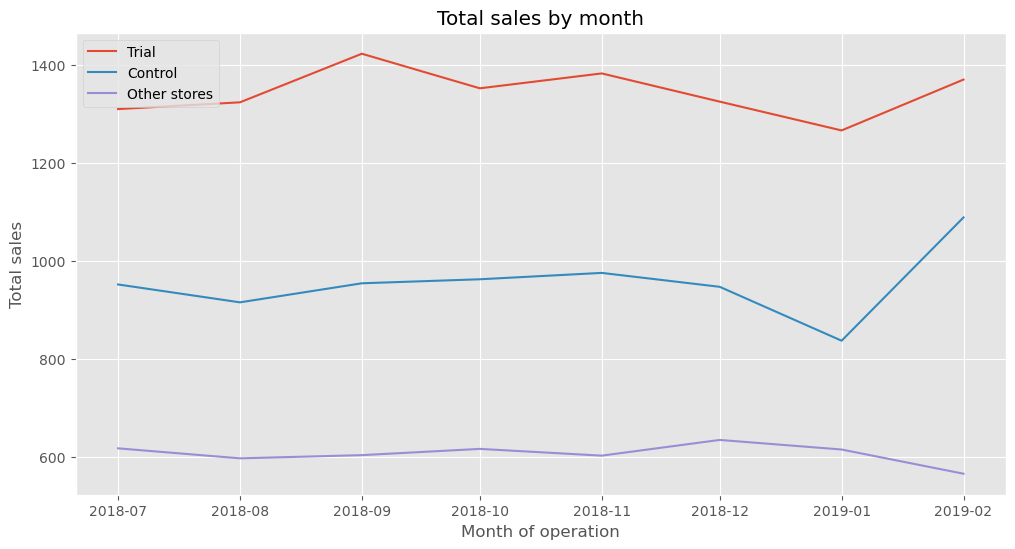

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Define your trial and control store numbers
trial_store = 88
control_store = 178

# Create a new column 'Store_type' in the DataFrame based on the store number
measureOverTime['Store_type'] = measureOverTime['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores'))

# Convert 'YEARMONTH' to a datetime object and store it in a new column 'TransactionMonth'
measureOverTime['TransactionMonth'] = measureOverTime['YEARMONTH'].dt.to_timestamp()

# Filter rows where 'YEARMONTH' is before March 2019
pastSales = measureOverTime[measureOverTime['TransactionMonth'] < pd.to_datetime('2019-03')]

# Group by 'TransactionMonth' and 'Store_type', and calculate the mean of 'totSales'
pastSales = pastSales.groupby(['TransactionMonth', 'Store_type'])['totSales'].mean().reset_index()

# Create a new figure
plt.figure(figsize=(12, 6))

# For each store type, plot total sales over time
for store_type in ['Trial', 'Control', 'Other stores']:
    data = pastSales[pastSales['Store_type'] == store_type]
    plt.plot(data['TransactionMonth'], data['totSales'], label=store_type)

# Set labels and title for the plot
plt.xlabel('Month of operation')
plt.ylabel('Total sales')
plt.title('Total sales by month')

# Display the legend
plt.legend()

# Show the plot
plt.show()


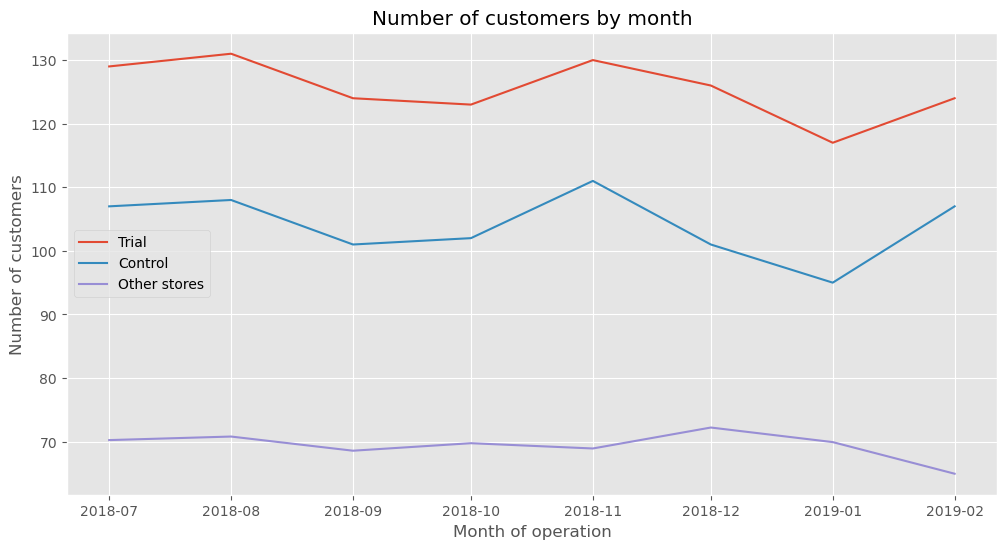

In [87]:
# Define your trial and control store numbers
trial_store = 88
control_store = 178

# Create a new column 'Store_type' in the DataFrame based on the store number
measureOverTime['Store_type'] = measureOverTime['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores'))

# Convert 'YEARMONTH' to a datetime object and store it in a new column 'TransactionMonth'
measureOverTime['TransactionMonth'] = measureOverTime['YEARMONTH'].dt.to_timestamp()

# Filter rows where 'YEARMONTH' is before March 2019
pastCustomers = measureOverTime[measureOverTime['TransactionMonth'] < pd.to_datetime('2019-03')]

# Group by 'TransactionMonth' and 'Store_type', and calculate the mean of 'nCustomers'
pastCustomers = pastCustomers.groupby(['TransactionMonth', 'Store_type'])['nCustomers'].mean().reset_index()

# Create a new figure
plt.figure(figsize=(12, 6))

# For each store type, plot total customers over time
for store_type in ['Trial', 'Control', 'Other stores']:
    data = pastCustomers[pastCustomers['Store_type'] == store_type]
    plt.plot(data['TransactionMonth'], data['nCustomers'], label=store_type)

# Set labels and title for the plot
plt.xlabel('Month of operation')
plt.ylabel('Number of customers')
plt.title('Number of customers by month')

# Display the legend
plt.legend()

# Show the plot
plt.show()


In [88]:
# Calculate the scaling factor for control sales
scalingFactorForControlSales = preTrialMeasures.loc[(preTrialMeasures['STORE_NBR'] == trial_store) & (preTrialMeasures['YEARMONTH'] < '2019-02'), 'totSales'].sum() / preTrialMeasures.loc[(preTrialMeasures['STORE_NBR'] == control_store) & (preTrialMeasures['YEARMONTH'] < '2019-02'), 'totSales'].sum()

# Apply the scaling factor to control store's sales
measureOverTimeSales = measureOverTime.copy()
scaledControlSales = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == control_store].copy()
scaledControlSales['controlSales'] = scaledControlSales['totSales'] * scalingFactorForControlSales


In [89]:
# Merge the trial store's sales data with the scaled control store's sales data
percentageDiff = pd.merge(measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == trial_store], scaledControlSales, on='YEARMONTH')

# Calculate the percentage difference
percentageDiff['percentageDiff'] = abs((percentageDiff['totSales_x'] - percentageDiff['controlSales']) / percentageDiff['controlSales'])


In [90]:
# Display the DataFrame
display(percentageDiff)

,STORE_NBR_x,YEARMONTH,totSales_x,nCustomers_x,nTxnPerCust_x,nChipsPerTxn_x,avgPricePerUnit_x,Store_type_x,TransactionMonth_x,STORE_NBR_y,totSales_y,nCustomers_y,nTxnPerCust_y,nChipsPerTxn_y,avgPricePerUnit_y,Store_type_y,TransactionMonth_y,controlSales,percentageDiff
0,88,2018-07,1310.00,129,1.186047,2.000000,4.281046,Trial,2018-07-01,178,952.0,107,1.233645,2.000000,3.606061,Control,2018-07-01,1364.991550,0.040287
1,88,2018-08,1323.80,131,1.221374,1.893750,4.368977,Trial,2018-08-01,178,915.5,108,1.250000,1.874074,3.618577,Control,2018-08-01,1312.657315,0.008489
2,88,2018-09,1423.00,124,1.282258,2.000000,4.474843,Trial,2018-09-01,178,954.4,101,1.316832,2.000000,3.587970,Control,2018-09-01,1368.432705,0.039876
3,88,2018-10,1352.40,123,1.284553,2.000000,4.279747,Trial,2018-10-01,178,962.6,102,1.421569,2.000000,3.319310,Control,2018-10-01,1380.189985,0.020135
4,88,2018-11,1382.80,130,1.207692,2.000000,4.403822,Trial,2018-11-01,178,975.6,111,1.252252,2.000000,3.509353,Control,2018-11-01,1398.829576,0.011459
5,88,2018-12,1325.20,126,1.182540,2.000000,4.446980,Trial,2018-12-01,178,947.2,101,1.336634,2.000000,3.508148,Control,2018-12-01,1358.109240,0.024232
6,88,2019-01,1266.40,117,1.247863,2.000000,4.336986,Trial,2019-01-01,178,837.2,95,1.284211,2.000000,3.431148,Control,2019-01-01,1200.389628,0.054991
7,88,2019-02,1370.20,124,1.241935,2.000000,4.448701,Trial,2019-02-01,178,1088.8,107,1.373832,2.000000,3.703401,Control,2019-02-01,1561.137395,0.122307
8,88,2019-03,1477.20,134,1.268657,2.000000,4.344706,Trial,2019-03-01,178,998.8,114,1.254386,2.000000,3.492308,Control,2019-03-01,1432.094076,0.031496
9,88,2019-04,1439.40,128,1.265625,2.000000,4.442593,Trial,2019-04-01,178,1059.8,117,1.282051,2.000000,3.532667,Control,2019-04-01,1519.556770,0.052750


In [91]:
import numpy as np
from scipy import stats

# Calculate the standard deviation of the percentage difference during the pre-trial period
stdDev = percentageDiff.loc[percentageDiff['YEARMONTH'] < '2019-02', 'percentageDiff'].std()

# Define the degrees of freedom
degreesOfFreedom = 7

# Calculate the t-values for the trial months
percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - 0) / stdDev

# Filter rows for the trial period
trial_period_tvalues = percentageDiff.loc[(percentageDiff['YEARMONTH'] >= '2019-02') & (percentageDiff['YEARMONTH'] <= '2019-04')]

# Print the t-values for the trial period
print(trial_period_tvalues)

# Calculate the 95th percentile of the t-distribution
critical_t_value = stats.t.ppf(1-0.05, df=degreesOfFreedom)

# Print the critical t-value
print("Critical t-value: ", critical_t_value)


   STORE_NBR_x YEARMONTH  totSales_x  nCustomers_x  nTxnPerCust_x  \
7           88   2019-02      1370.2           124       1.241935   
8           88   2019-03      1477.2           134       1.268657   
9           88   2019-04      1439.4           128       1.265625   

   nChipsPerTxn_x  avgPricePerUnit_x Store_type_x TransactionMonth_x  \
7             2.0           4.448701        Trial         2019-02-01   
8             2.0           4.344706        Trial         2019-03-01   
9             2.0           4.442593        Trial         2019-04-01   

   STORE_NBR_y  totSales_y  nCustomers_y  nTxnPerCust_y  nChipsPerTxn_y  \
7          178      1088.8           107       1.373832             2.0   
8          178       998.8           114       1.254386             2.0   
9          178      1059.8           117       1.282051             2.0   

   avgPricePerUnit_y Store_type_y TransactionMonth_y  controlSales  \
7           3.703401      Control         2019-02-01   1561.137

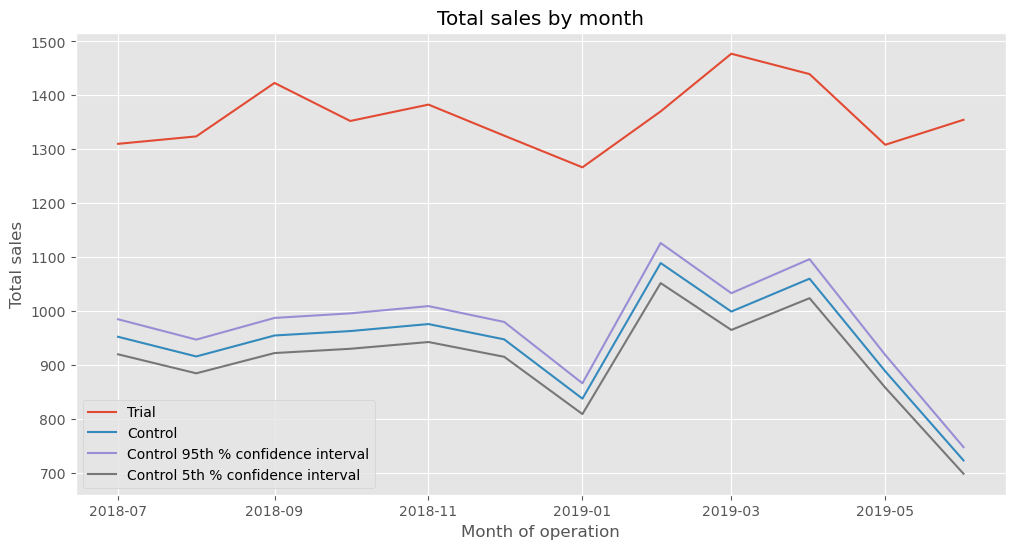

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Define your trial and control store numbers
trial_store = 88
control_store = 178

# Create a new column 'Store_type' in the DataFrame based on the store number
measureOverTimeSales['Store_type'] = measureOverTimeSales['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores'))

# Convert 'YEARMONTH' to a datetime object and store it in a new column 'TransactionMonth'
measureOverTimeSales['TransactionMonth'] = measureOverTimeSales['YEARMONTH'].dt.to_timestamp()

# Filter rows for trial and control stores
pastSales = measureOverTimeSales.loc[measureOverTimeSales['Store_type'].isin(['Trial', 'Control'])]

# Calculate control store's 95th percentile sales
pastSales_Controls95 = pastSales.loc[pastSales['Store_type'] == "Control"].copy()
pastSales_Controls95['totSales'] = pastSales_Controls95['totSales'] * (1 + stdDev * 2)
pastSales_Controls95['Store_type'] = "Control 95th % confidence interval"

# Calculate control store's 5th percentile sales
pastSales_Controls5 = pastSales.loc[pastSales['Store_type'] == "Control"].copy()
pastSales_Controls5['totSales'] = pastSales_Controls5['totSales'] * (1 - stdDev * 2)
pastSales_Controls5['Store_type'] = "Control 5th % confidence interval"

# Combine the data
trialAssessment = pd.concat([pastSales, pastSales_Controls95, pastSales_Controls5])

# Create a new figure
plt.figure(figsize=(12, 6))

# For each store type, plot total sales over time
for store_type in ['Trial', 'Control', 'Control 95th % confidence interval', 'Control 5th % confidence interval']:
    data = trialAssessment[trialAssessment['Store_type'] == store_type]
    plt.plot(data['TransactionMonth'], data['totSales'], label=store_type)

# Set labels and title for the plot
plt.xlabel('Month of operation')
plt.ylabel('Total sales')
plt.title('Total sales by month')

# Display the legend
plt.legend()

# Show the plot
plt.show()

In [93]:
# Calculate the scaling factor for control customers
scalingFactorForControlCust = preTrialMeasures.loc[(preTrialMeasures['STORE_NBR'] == trial_store) & (preTrialMeasures['YEARMONTH'] < '2019-02'), 'nCustomers'].sum() / preTrialMeasures.loc[(preTrialMeasures['STORE_NBR'] == control_store) & (preTrialMeasures['YEARMONTH'] < '2019-02'), 'nCustomers'].sum()

# Apply the scaling factor to control store's customer counts
measureOverTimeCusts = measureOverTime.copy()
scaledControlCustomers = measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR'] == control_store].copy()
scaledControlCustomers['controlCustomers'] = scaledControlCustomers['nCustomers'] * scalingFactorForControlCust

# Create a new column 'Store_type' in the DataFrame based on the store number
scaledControlCustomers['Store_type'] = scaledControlCustomers['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores'))

# Calculate the percentage difference between scaled control customers and trial customers
percentageDiff = pd.merge(measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR'] == trial_store], scaledControlCustomers, on='YEARMONTH')
percentageDiff['percentageDiff'] = abs((percentageDiff['nCustomers_x'] - percentageDiff['controlCustomers']) / percentageDiff['controlCustomers'])


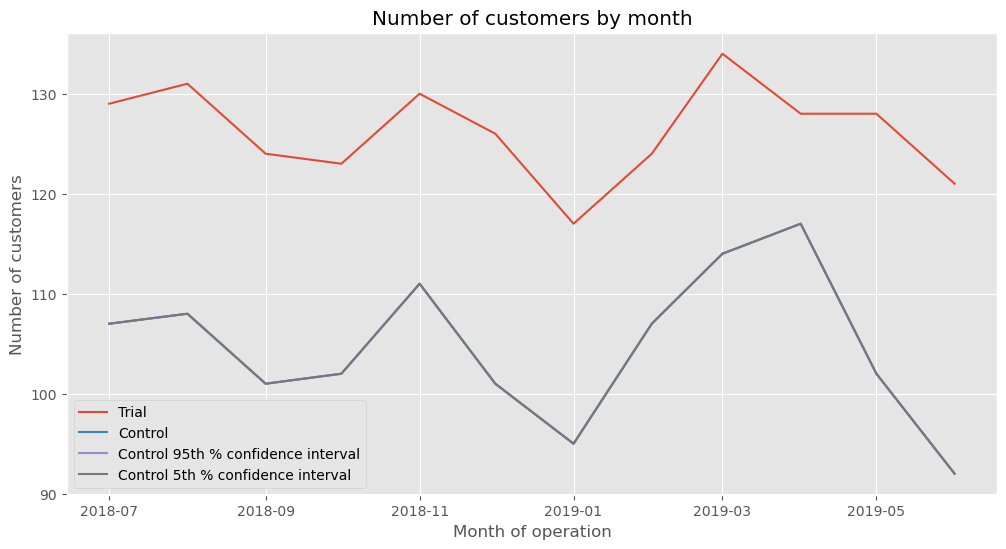

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 6))

# For each store type, plot total customers over time
for store_type in ['Trial', 'Control', 'Control 95th % confidence interval', 'Control 5th % confidence interval']:
    data = trialAssessment[trialAssessment['Store_type'] == store_type]
    ax.plot(data['TransactionMonth'], data['nCustomers'], label=store_type)

# Highlight the trial period
trial_start = pd.to_datetime('2019-02')
trial_end = pd.to_datetime('2019-04')
rect = patches.Rectangle((trial_start, 0), trial_end-trial_start, np.inf, linewidth=0, edgecolor='none', facecolor='gray', alpha=0.2)
ax.add_patch(rect)

# Set labels and title for the plot
plt.xlabel('Month of operation')
plt.ylabel('Number of customers')
plt.title('Number of customers by month')

# Display the legend
plt.legend()

# Show the plot
plt.show()